In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Cardiotocographic.csv")
print(df.head())
print(df.isnull().sum())
df.fillna(df.median(), inplace=True)
print(df.dtypes)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS  

In [7]:
summary = df.describe().transpose()
print(summary)

for col in df.select_dtypes(include=np.number).columns:
    print(f"{col}: Median = {df[col].median()}, IQR = {df[col].quantile(0.75) - df[col].quantile(0.25)}")

print(df.skew())


          count        mean        std         min         25%         50%  \
LB        896.0  131.859413   9.393070  106.000000  125.000000  133.000000   
AC        896.0    0.004036   0.003710   -0.000122    0.000006    0.003311   
FM        896.0    0.000606   0.001346   -0.002467    0.000000    0.000000   
UC        896.0    0.004961   0.002707   -0.000101    0.003143    0.005039   
DL        896.0    0.001547   0.002214   -0.000124    0.000000    0.000000   
DS        896.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        896.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      896.0   42.465669  15.055465   15.000000   29.000000   41.000000   
MSTV      896.0    1.273759   0.541923    0.300000    0.900000    1.200000   
ALTV      896.0    3.153095   6.032308   -1.043619    0.000000    0.000000   
MLTV      896.0    8.596245   4.457159   -0.136053    5.600000    8.400000   
Width     896.0   67.784187  32.370319   12.000000   41.000000  

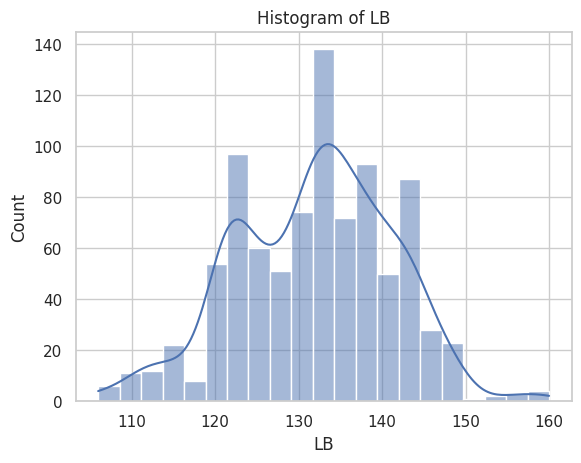

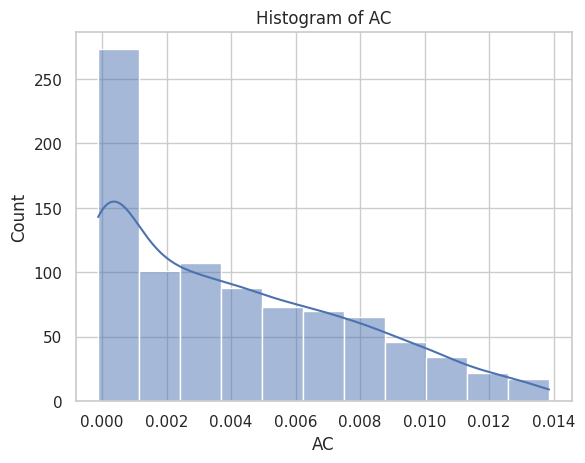

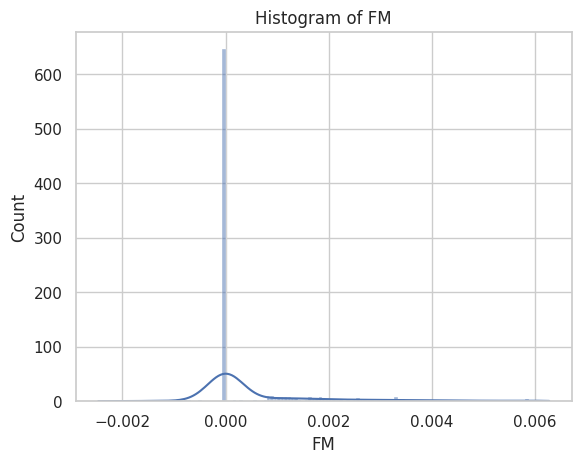

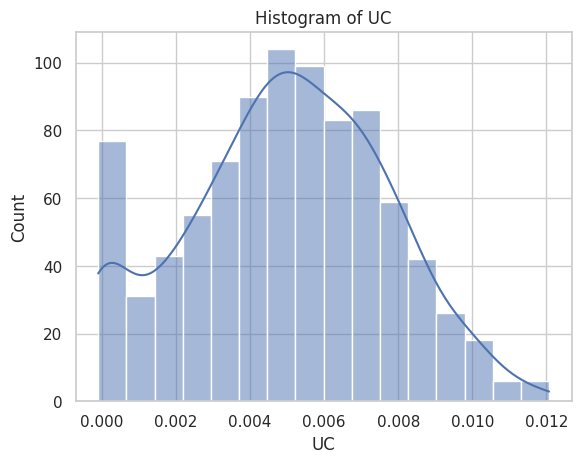

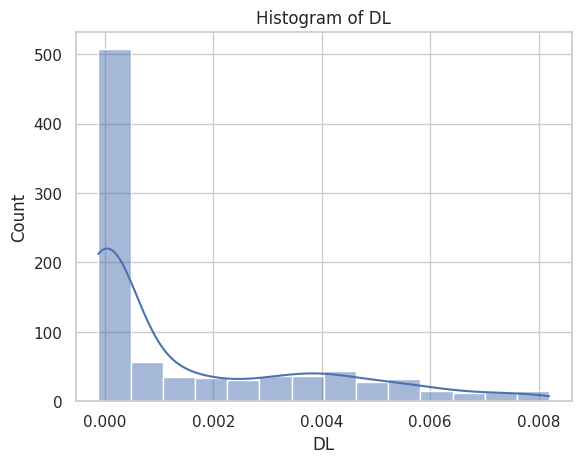

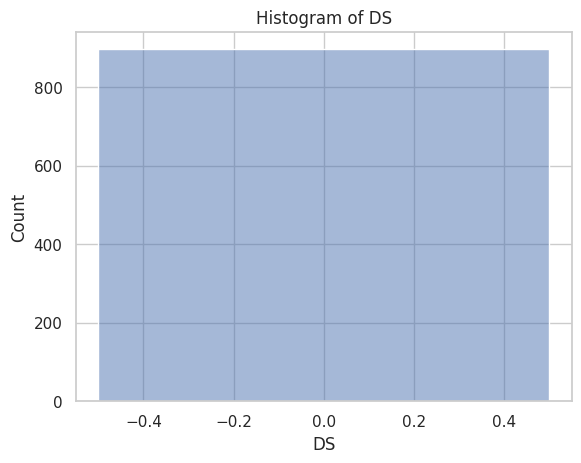

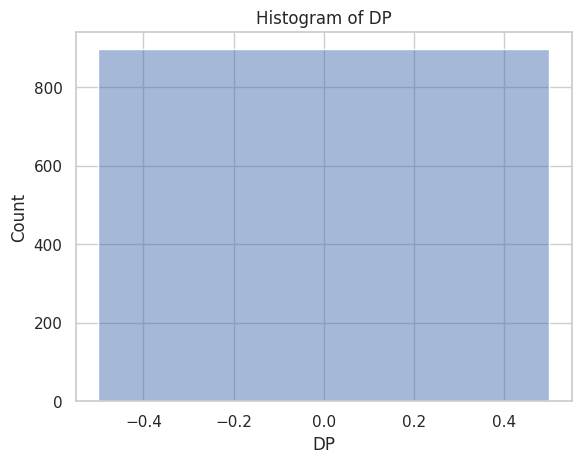

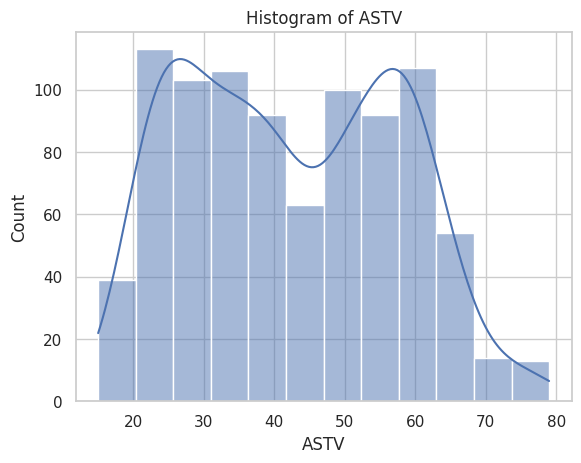

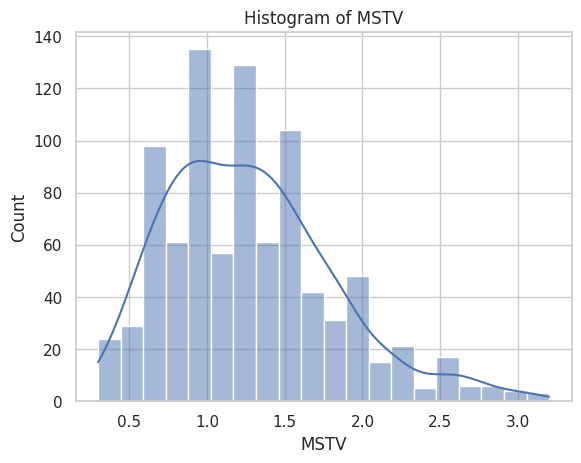

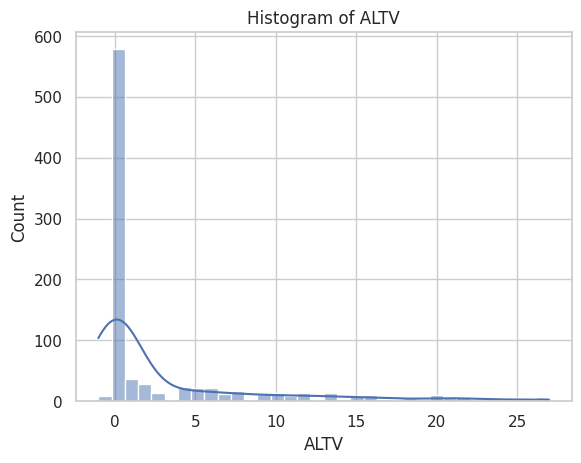

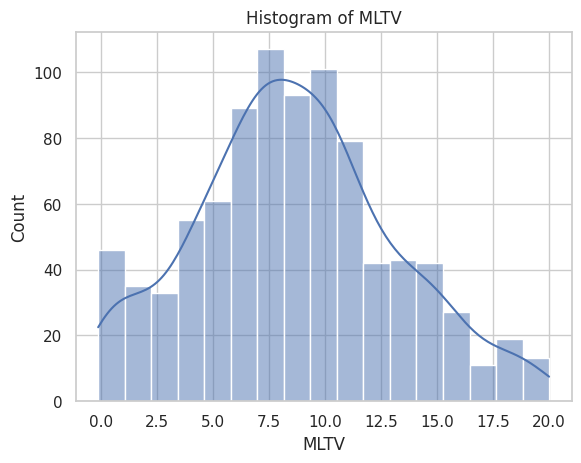

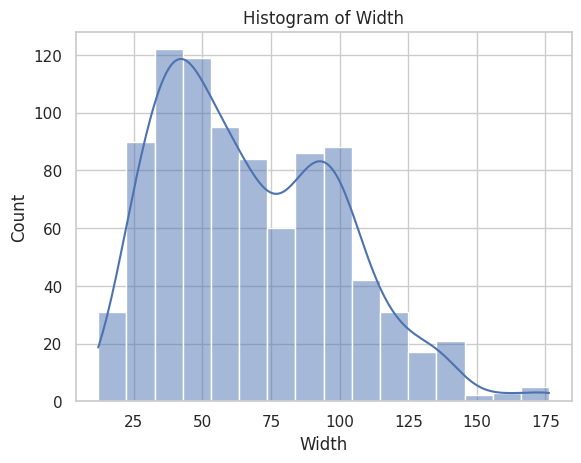

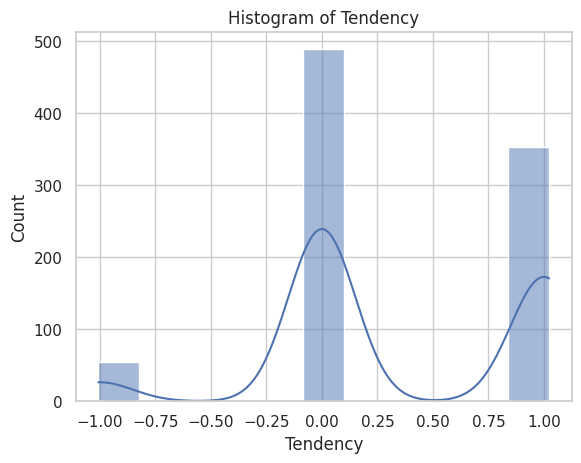

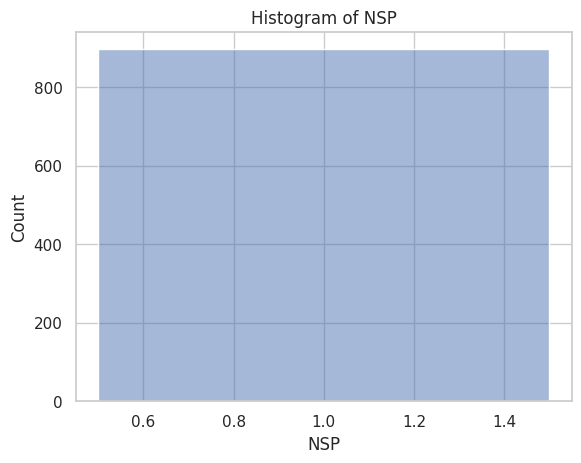

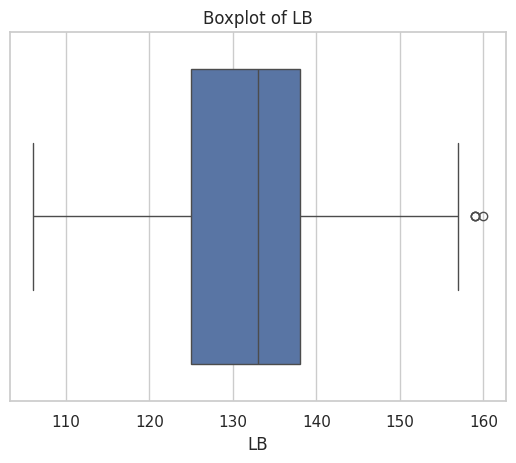

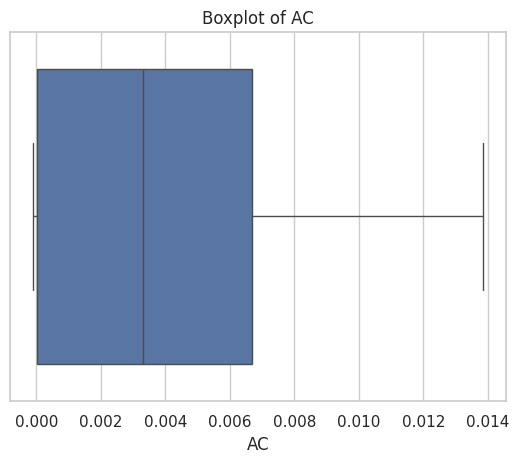

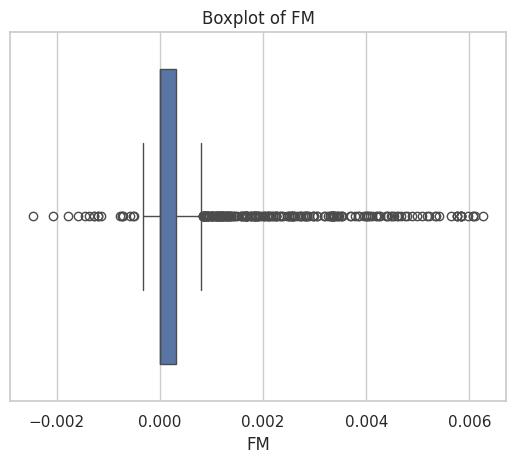

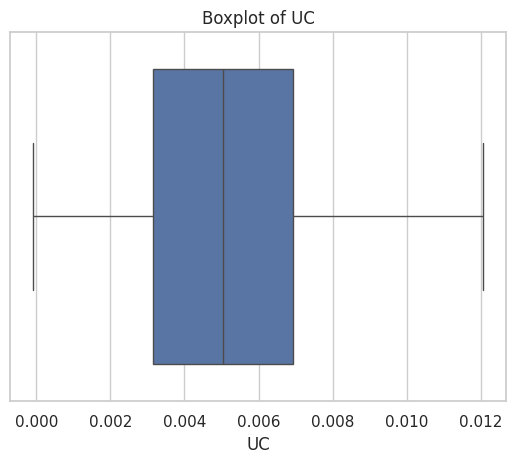

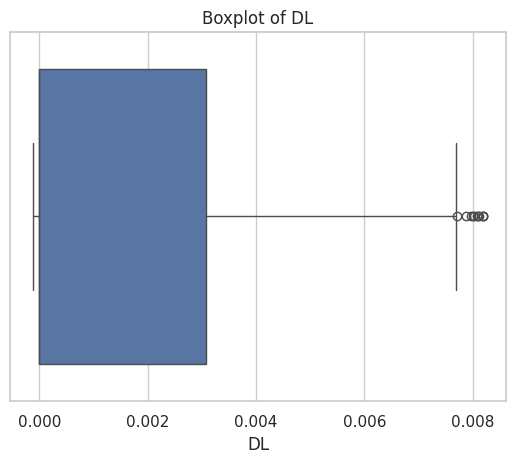

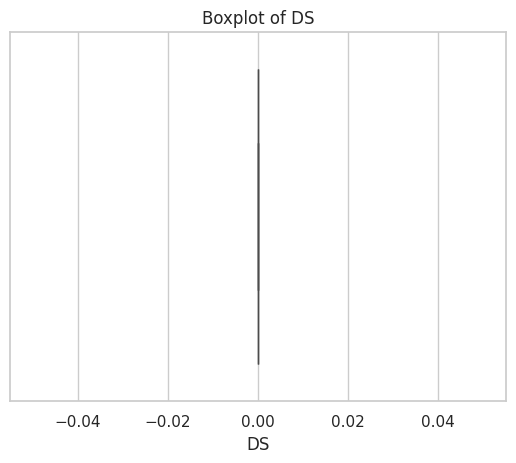

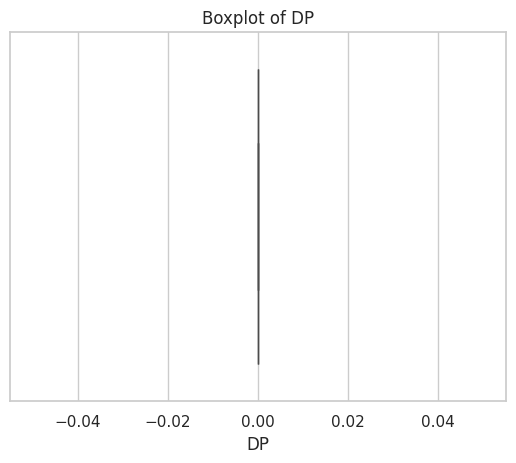

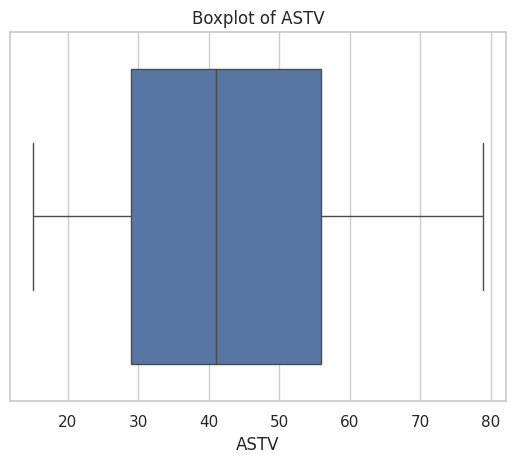

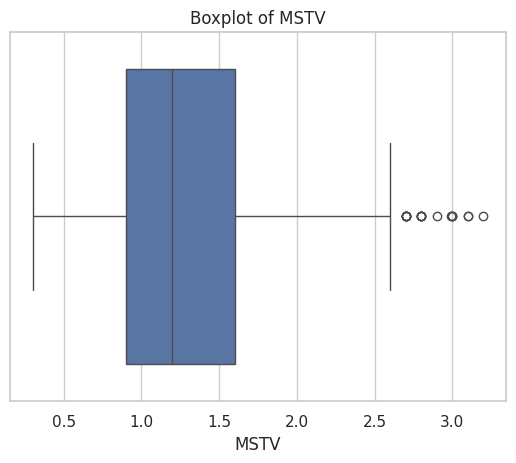

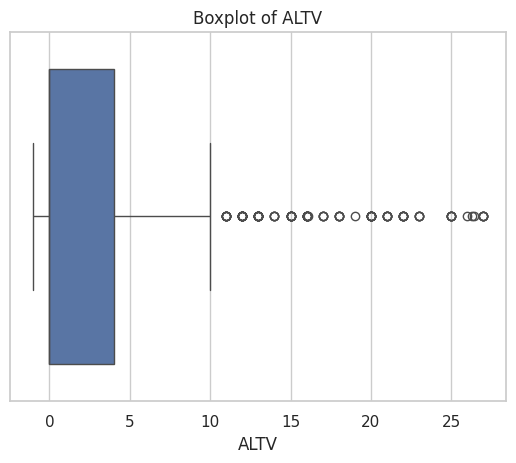

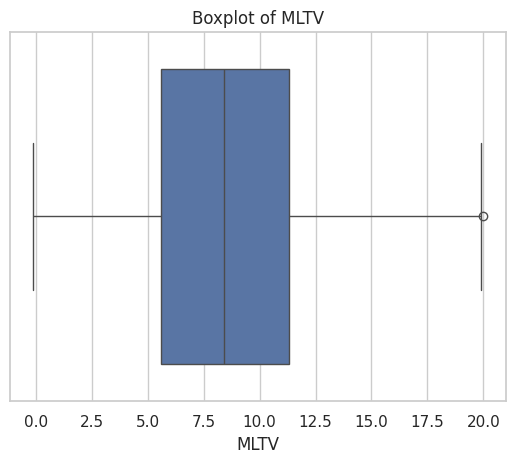

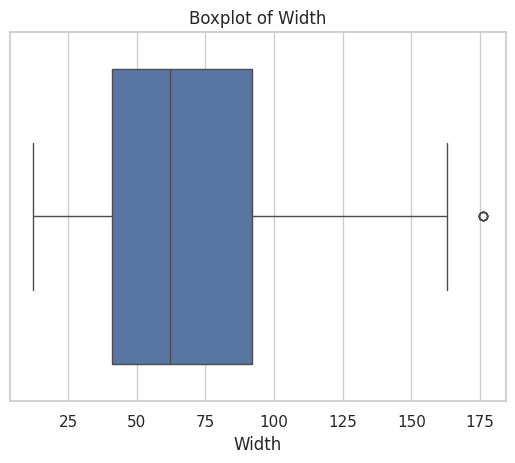

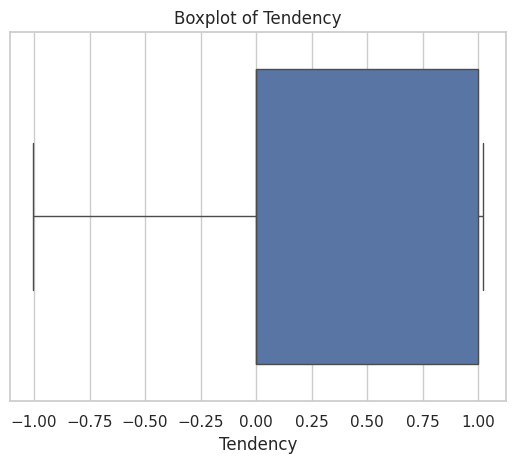

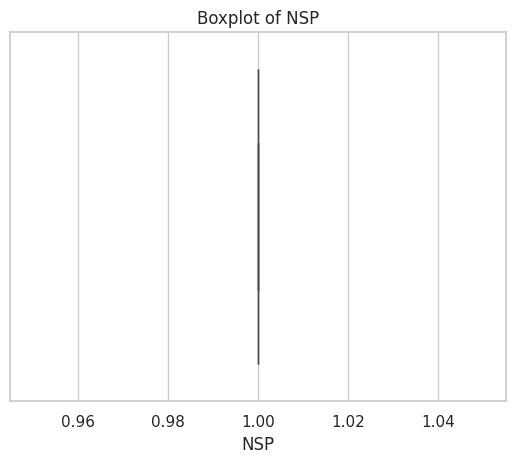

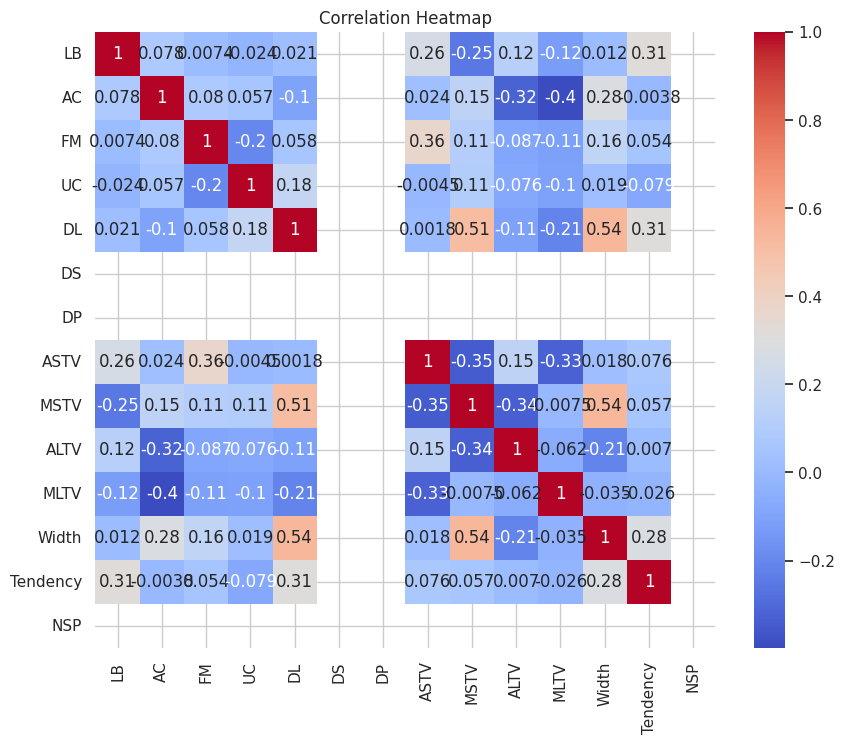

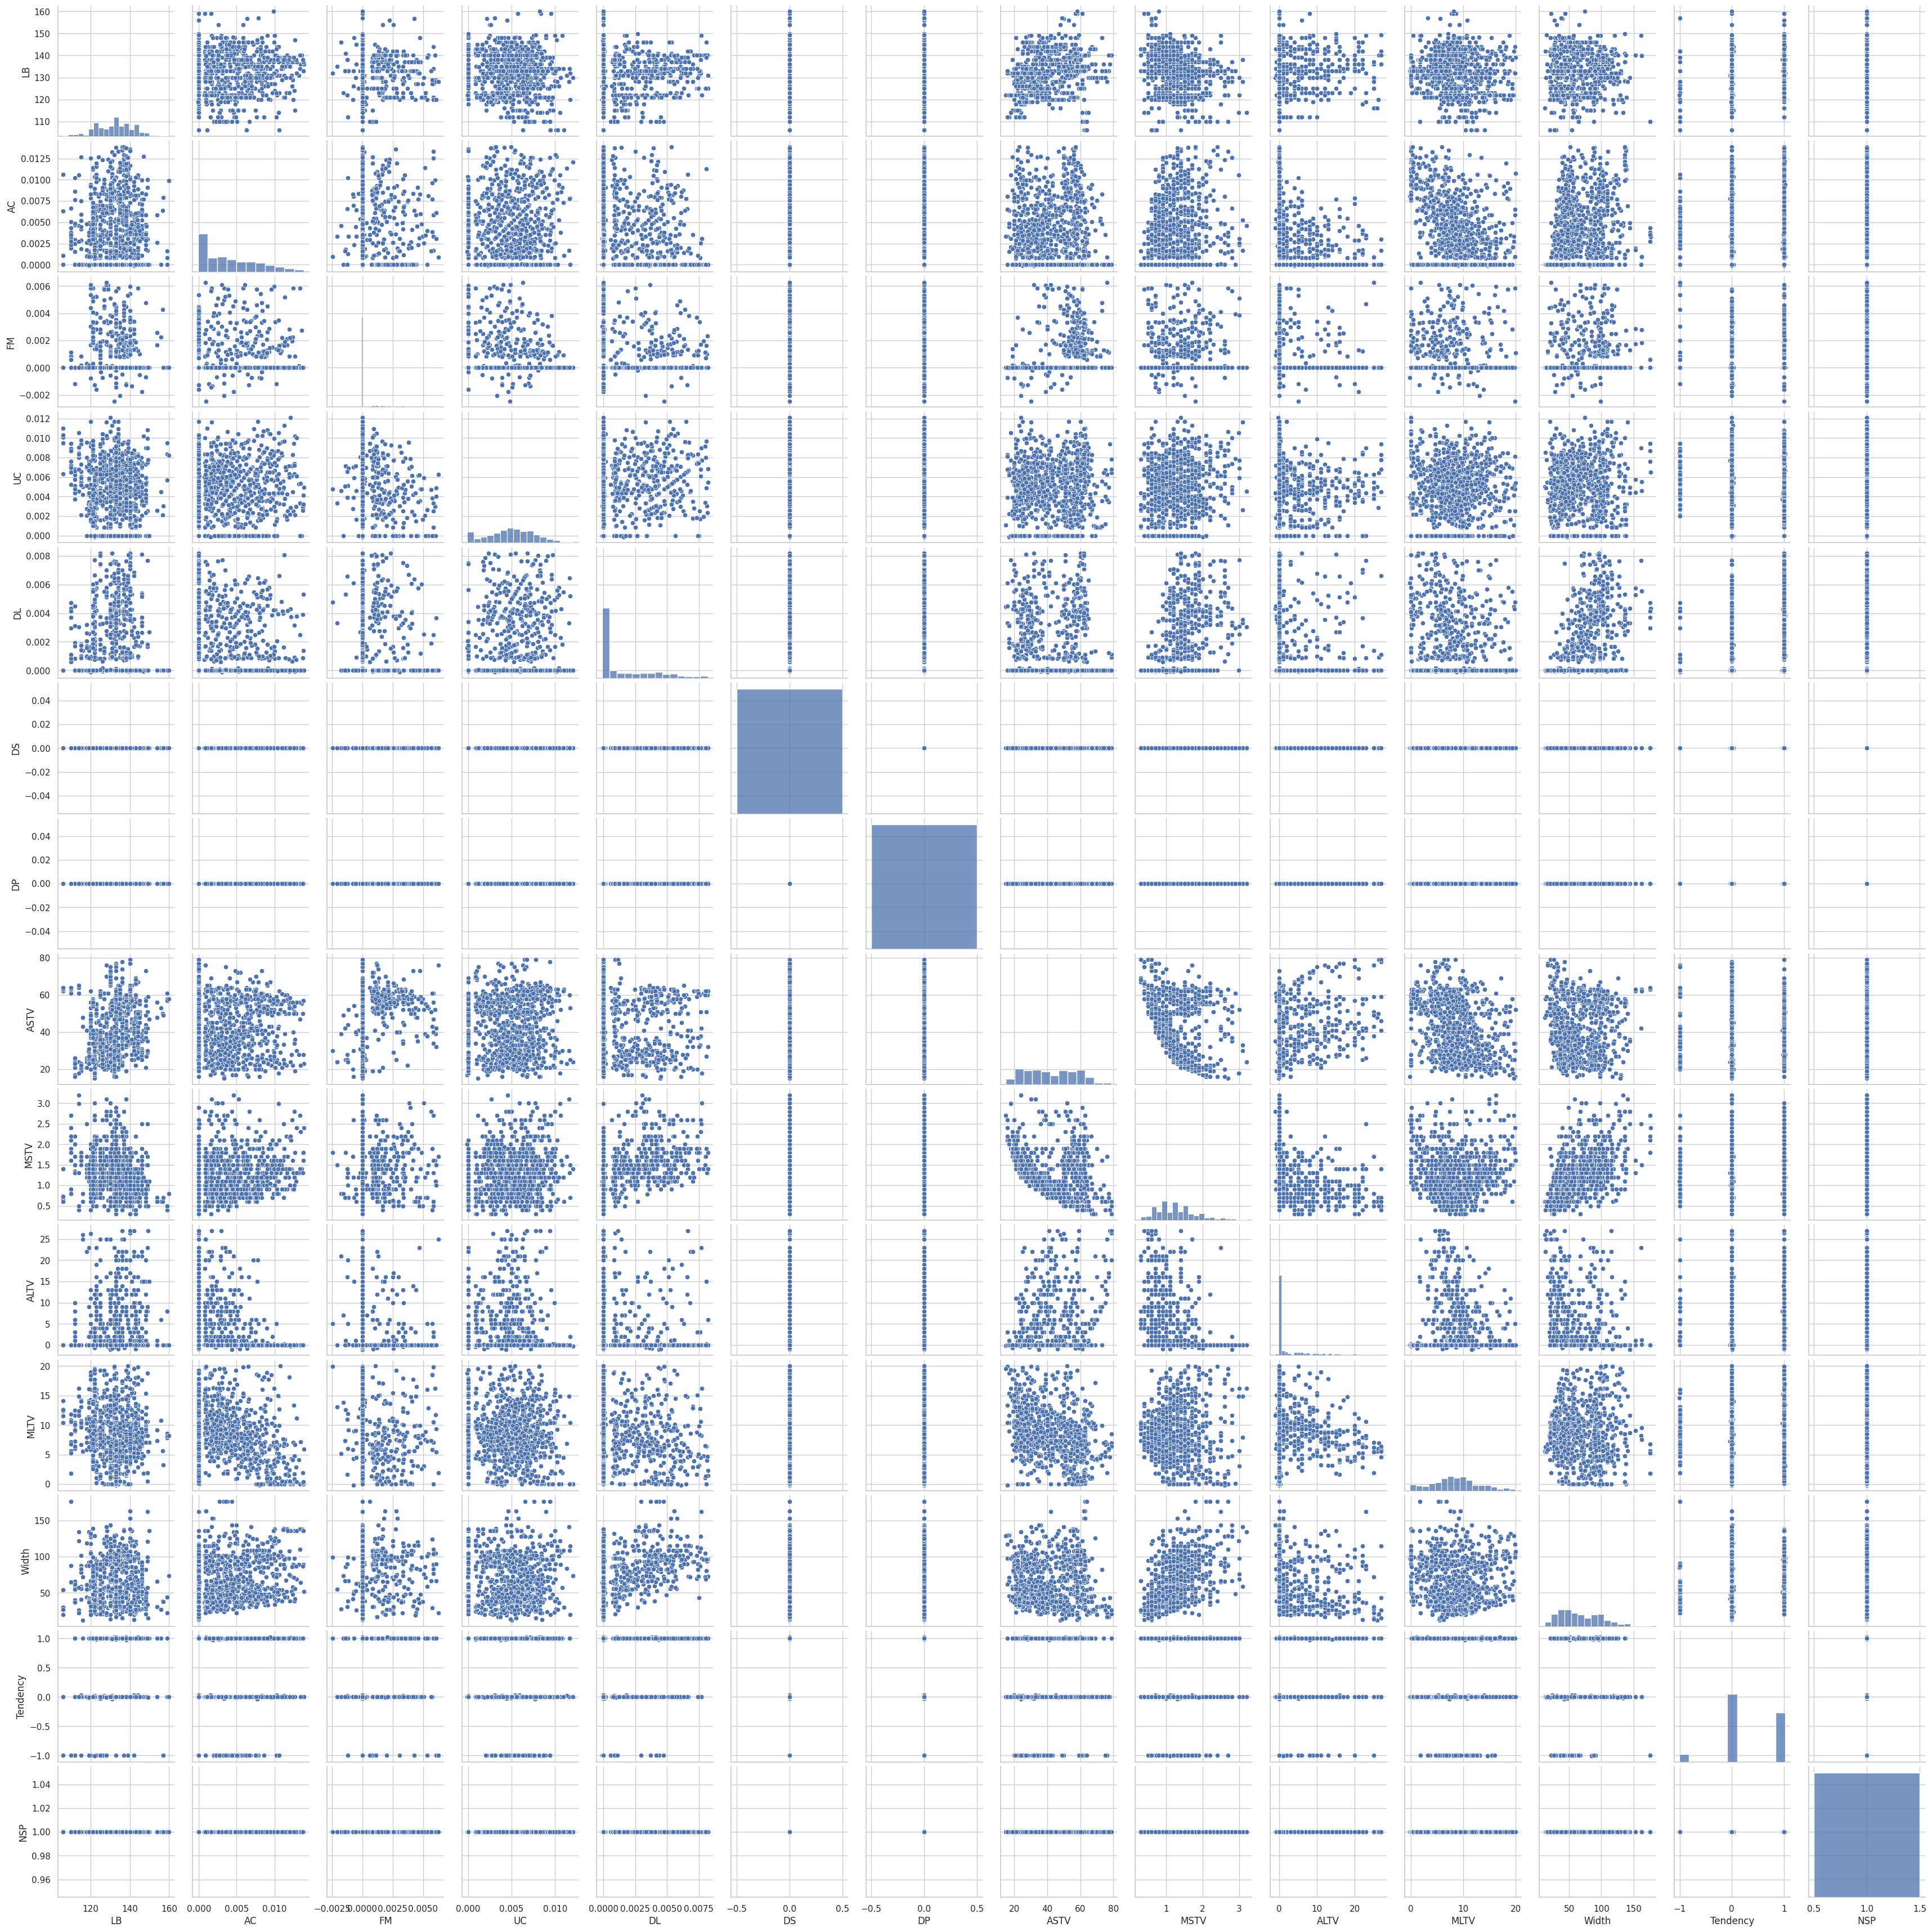

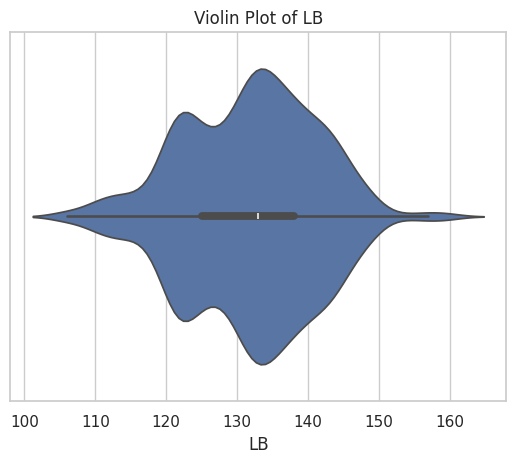

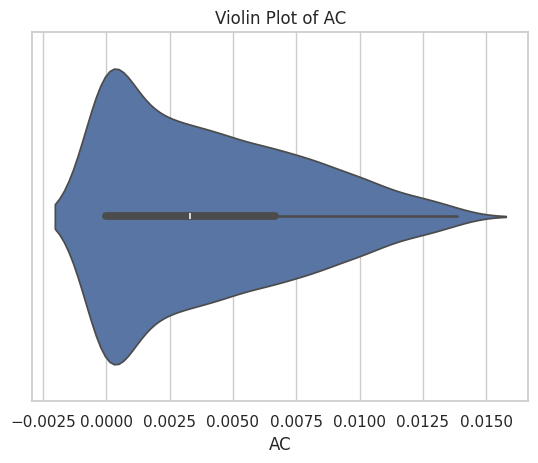

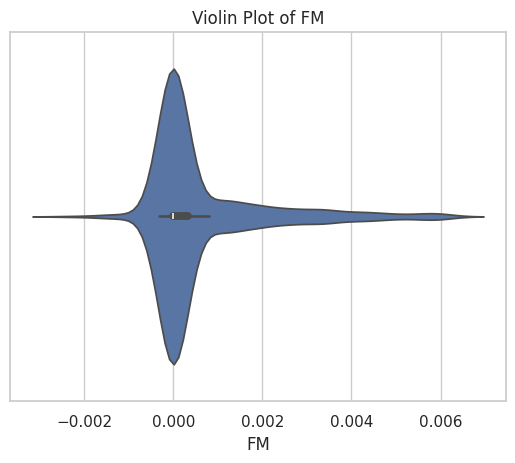

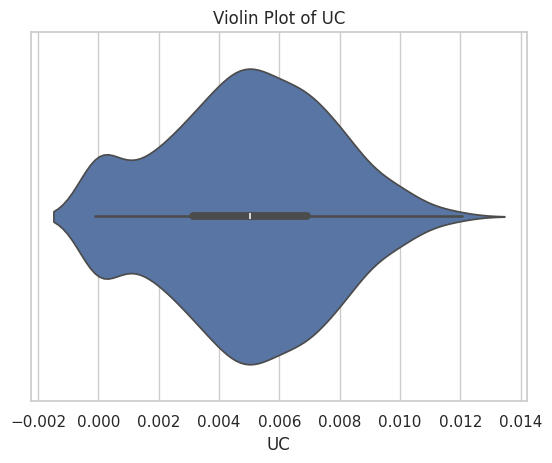

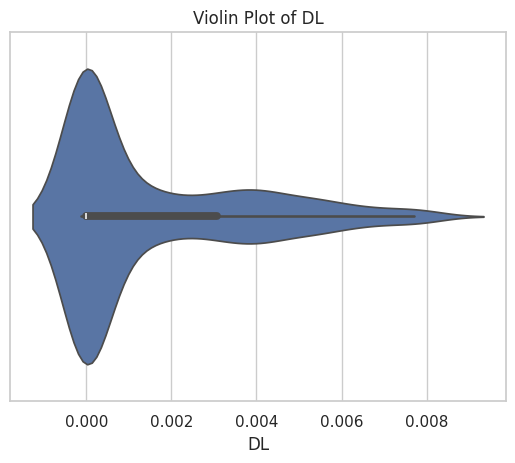

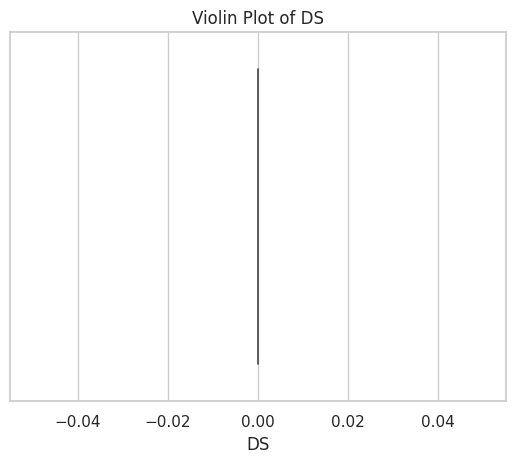

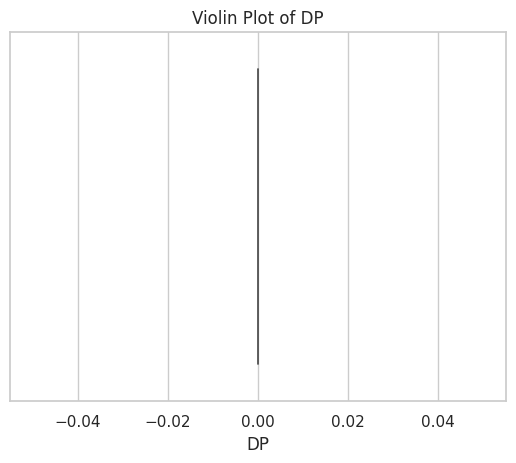

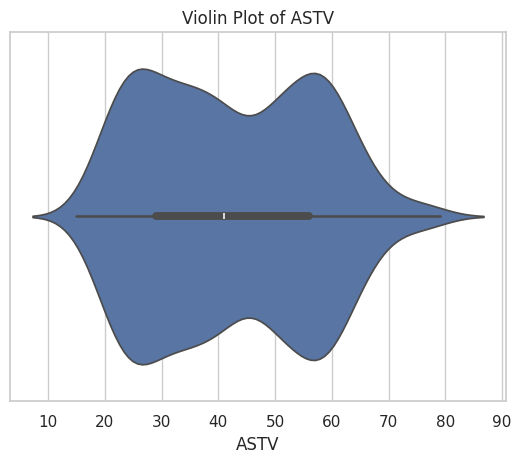

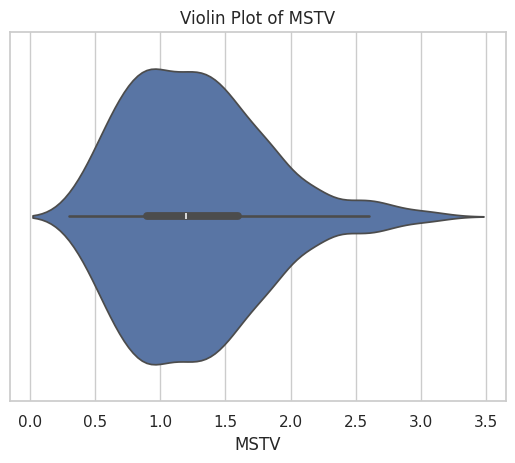

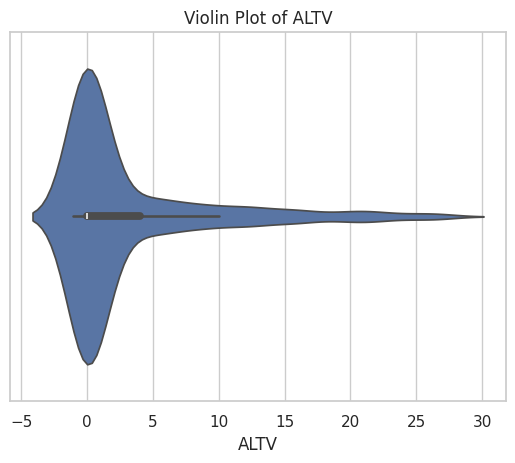

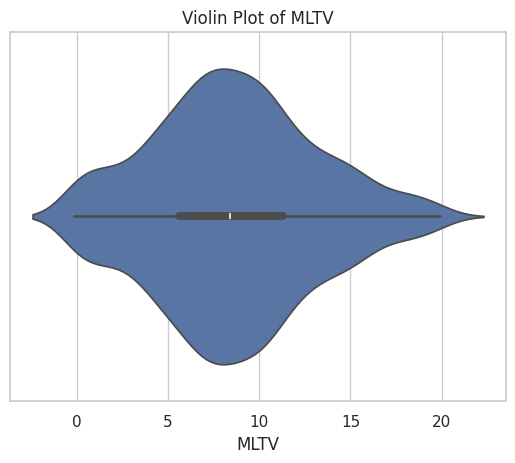

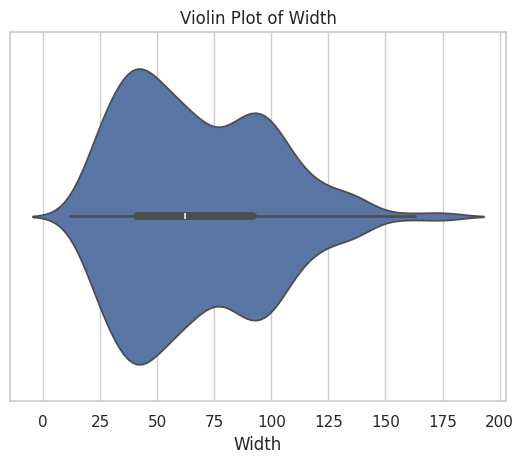

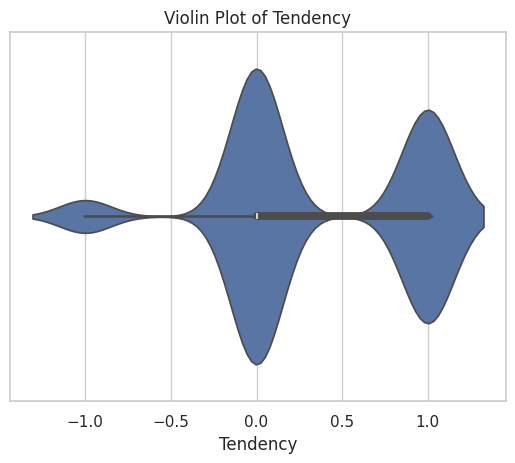

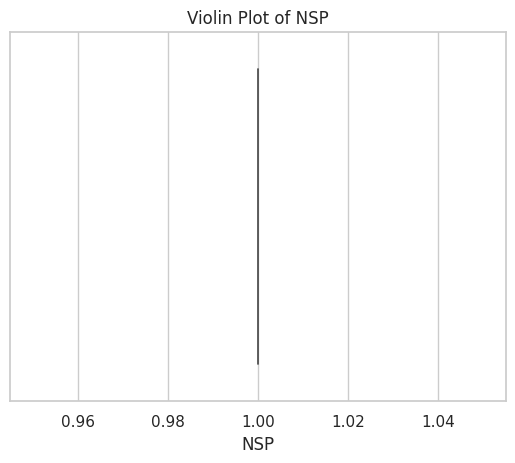

In [8]:

sns.set(style="whitegrid")

for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df)
plt.show()

for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()


Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.078465  0.007362 -0.023568  0.020806 NaN NaN  0.262721   
AC        0.078465  1.000000  0.080153  0.057284 -0.101866 NaN NaN  0.024343   
FM        0.007362  0.080153  1.000000 -0.204990  0.058476 NaN NaN  0.362630   
UC       -0.023568  0.057284 -0.204990  1.000000  0.177702 NaN NaN -0.004523   
DL        0.020806 -0.101866  0.058476  0.177702  1.000000 NaN NaN  0.001806   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.262721  0.024343  0.362630 -0.004523  0.001806 NaN NaN  1.000000   
MSTV     -0.254885  0.152222  0.113420  0.110100  0.509405 NaN NaN -0.347374   
ALTV      0.123808 -0.323303 -0.087180 -0.076435 -0.107464 NaN NaN  0.150569   
MLTV     -0.118814 -0.397042 -0.110709 -0.104061 -0.214110 NaN NaN -0.330139   
Width     0.011746  

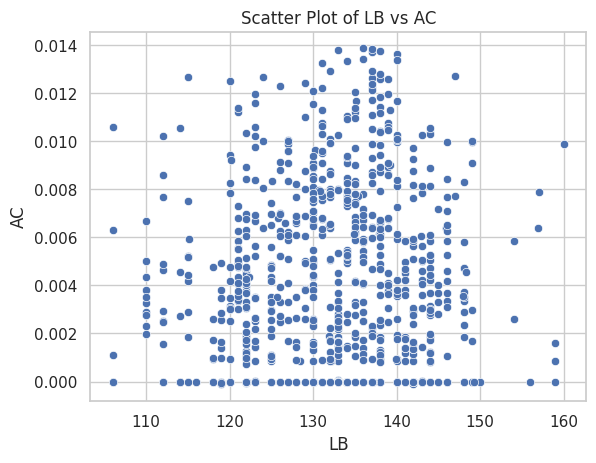

There are non-finite values in the correlation matrix.


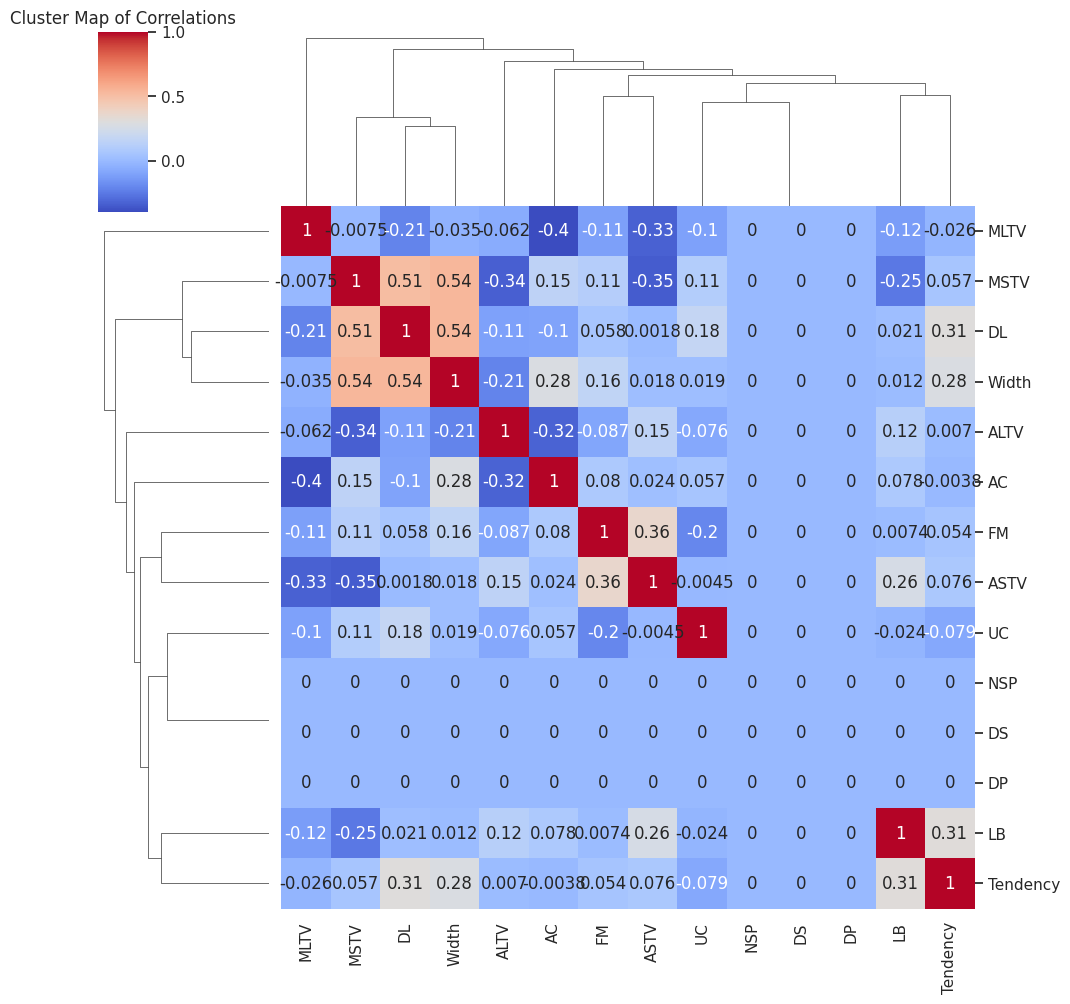

In [11]:
print("Correlation Matrix:")
print(correlation)
sns.scatterplot(x='LB', y='AC', data=df)
plt.title("Scatter Plot of LB vs AC")
plt.show()

if not np.all(np.isfinite(correlation)):
    print("There are non-finite values in the correlation matrix.")
correlation = correlation.fillna(0)
correlation = correlation.replace([np.inf, -np.inf], 0)
sns.clustermap(correlation, cmap='coolwarm', annot=True)
plt.title("Cluster Map of Correlations")
plt.show()

